Loading modules and funcions

In [16]:
import datascience
import numpy as np
import pandas as pd

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics


Loading data

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
path= "/content/drive/My Drive/DS 402/New_Data.csv"
data = pd.read_csv(path)
data.head(5)

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


data preprocessing

In [19]:
data.isna().sum()

,0
Age,0
Course,0
Gender,0
CGPA,12
Stress_Level,0
Depression_Score,0
Anxiety_Score,0
Sleep_Quality,0
Physical_Activity,0
Diet_Quality,0


In [20]:
data = data.dropna()

In [21]:
data.shape

(6995, 20)

In [22]:
data['risk'] = ((data['Depression_Score'] > 3) | (data['Anxiety_Score'] > 3)).astype(int)

In [9]:
label_counts = data['risk'].value_counts()
print("Number of observations for each label:\n", label_counts)

Number of observations for each label:
 risk
0    3926
1    3069
Name: count, dtype: int64


EDA

In [28]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['Age', 'CGPA', 'Stress_Level','Financial_Stress', 'Semester_Credit_Load']
data[numeric_features].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.show()


In [11]:
categorical_features = ['Course', 'Gender', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Residence_Type']
for col in categorical_features:
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()


In [12]:
#detect outliers
for feature in numeric_features:
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


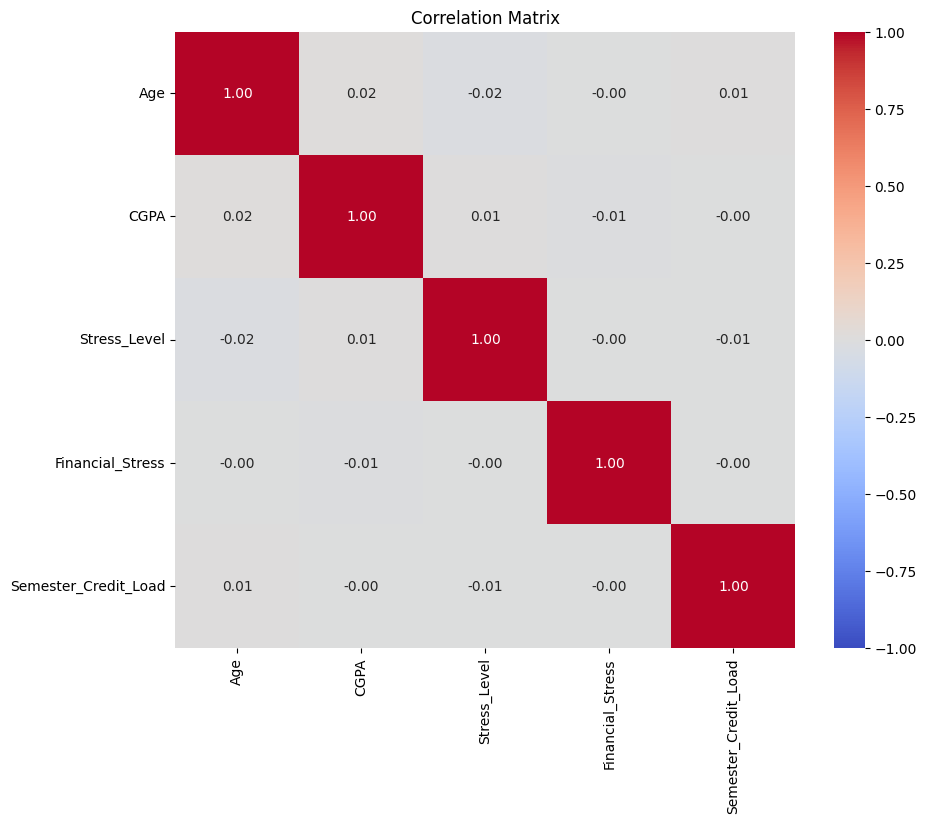

In [ ]:

numeric_features = ['Age', 'CGPA', 'Stress_Level','Financial_Stress', 'Semester_Credit_Load']
corr = data[numeric_features].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [13]:
pd.crosstab(data['Gender'], data['risk'], normalize='index')

risk,0,1
Gender,,
Female,0.557676,0.442324
Male,0.564762,0.435238


In [26]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features (X) and target (y)
X = data.drop('risk', axis=1)
y = data['risk']

# Define numerical and categorical features
numerical_cols = ['Age', 'CGPA', 'Stress_Level', 'Financial_Stress', 'Semester_Credit_Load']
categorical_cols = ['Course', 'Gender', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Residence_Type']


# Create transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the logistic regression pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6468906361686919
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       784
           1       0.63      0.47      0.54       615

    accuracy                           0.65      1399
   macro avg       0.64      0.63      0.63      1399
weighted avg       0.64      0.65      0.64      1399



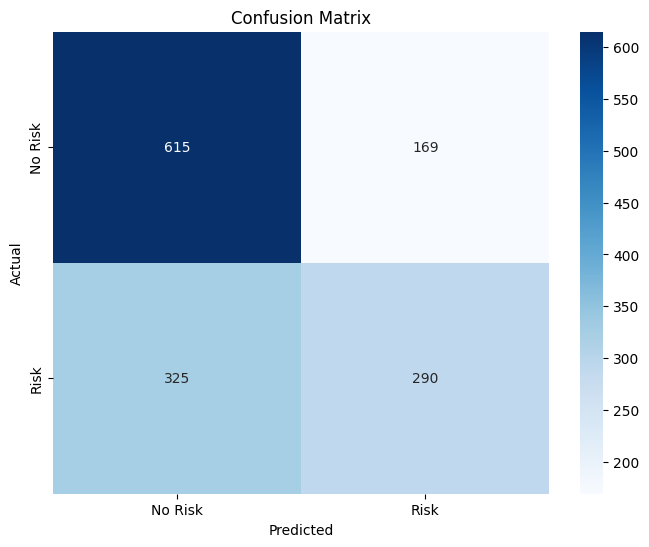

In [30]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Risk', 'Risk'],
            yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:


# Separate data by gender
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Get indices for male and female data in the original test set
male_indices = male_data.index.isin(X_test.index)
female_indices = female_data.index.isin(X_test.index)


# Separate predictions and actuals for male and female
y_pred_male = y_pred[male_indices]
y_test_male = y_test[male_indices]

y_pred_female = y_pred[female_indices]
y_test_female = y_test[female_indices]

# Confusion matrix for males
cm_male = confusion_matrix(y_test_male, y_pred_male)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_male, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Risk', 'Risk'],
            yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Male')
plt.show()

# Confusion matrix for females
cm_female = confusion_matrix(y_test_female, y_pred_female)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_female, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Risk', 'Risk'],
            yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Female')
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1399 but corresponding boolean dimension is 3536